# Your name: Bryan Lihardinata
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

Link to github:
https://github.com/blihardinata/Machine_learning/blob/main/India_Air_Quality_CA01_Bryan_Lihardinata.ipynb

Link to ReadMe: https://github.com/blihardinata/Machine_learning/blob/main/README.md

# Program Inititialization Section
## Enter your import packages here

In [2]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data File Reading Section
## Write code to read in data from external sources here

In [3]:
#read datasets
df = pd.read_csv('/content/data.csv', encoding='cp1252')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319959,293,November - M112001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",4.7,42.3,NaN,196.0,NaN,NaN,2001-11-01
319960,293,December - M122001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",6.5,41.5,NaN,192.0,NaN,NaN,2001-12-01
319961,294,January - M012001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",8.2,36.6,NaN,252.0,NaN,NaN,2001-01-01
319962,294,February - M022001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",6.5,34.2,NaN,372.0,NaN,NaN,2001-02-01


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [4]:
#Statistical Description of data (data.describe)
df.describe()

,so2,no2,rspm,spm,pm2_5
count,290729.000000,307131.000000,287813.000000,139276.000000,7866.000000
mean,10.742656,23.197227,99.421253,193.327792,39.336489
std,10.396647,15.926576,66.977076,130.295389,30.479184
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,4.000000,12.900000,54.000000,103.000000,24.000000
50%,8.000000,19.800000,84.000000,171.000000,32.000000
75%,14.000000,30.000000,125.000000,251.000000,43.000000
max,597.000000,696.000000,1082.000000,3380.000000,504.000000


In [5]:
#Statistical Description of data (data.describe)
df.shape

(319964, 13)

In [6]:
#Display number of non-null values for each column (data.count)
df.count()

stn_code                       215074
sampling_date                  319964
state                          319964
location                       319964
agency                         211423
type                           315620
so2                            290729
no2                            307131
rspm                           287813
spm                            139276
location_monitoring_station    298406
pm2_5                            7866
date                           319959
dtype: int64

In [7]:
#Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
df.info

<bound method DataFrame.info of        stn_code       sampling_date  ... pm2_5        date
0           150  February - M021990  ...   NaN  1990-02-01
1           151  February - M021990  ...   NaN  1990-02-01
2           152  February - M021990  ...   NaN  1990-02-01
3           150     March - M031990  ...   NaN  1990-03-01
4           151     March - M031990  ...   NaN  1990-03-01
...         ...                 ...  ...   ...         ...
319959      293  November - M112001  ...   NaN  2001-11-01
319960      293  December - M122001  ...   NaN  2001-12-01
319961      294   January - M012001  ...   NaN  2001-01-01
319962      294  February - M022001  ...   NaN  2001-02-01
319963      294     March - M032001  ...   NaN         NaN

[319964 rows x 13 columns]>

In [8]:
#Display Top 10 and Bottom 10 records (head and tail)
df.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [9]:
df.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
319954,293,June - M062001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",5.8,NaN,NaN,139.0,NaN,NaN,2001-06-01
319955,293,July - M072001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",4.4,NaN,NaN,26.0,NaN,NaN,2001-07-01
319956,293,August - M082001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",4.6,NaN,NaN,32.0,NaN,NaN,2001-08-01
319957,293,September - M092001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",4.0,NaN,NaN,45.0,NaN,NaN,2001-09-01
319958,293,October - M102001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",4.9,37.5,NaN,166.0,NaN,NaN,2001-10-01
319959,293,November - M112001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",4.7,42.3,NaN,196.0,NaN,NaN,2001-11-01
319960,293,December - M122001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",6.5,41.5,NaN,192.0,NaN,NaN,2001-12-01
319961,294,January - M012001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",8.2,36.6,NaN,252.0,NaN,NaN,2001-01-01
319962,294,February - M022001,Rajasthan,Udaipur,Rajasthan State Pollution Control Board,"Residential, Rural and other Areas",6.5,34.2,NaN,372.0,NaN,NaN,2001-02-01
319963,294,March - M032001,Rajasthan,Udaipur,Rajasthan State Pollution Cont,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [10]:
# Cleaning up the data
#dropping columns that aren't required

df.drop(["stn_code", "agency", "sampling_date", "location_monitoring_station"], axis = 1, inplace= True)
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
319959,Rajasthan,Udaipur,"Residential, Rural and other Areas",4.7,42.3,NaN,196.0,NaN,2001-11-01
319960,Rajasthan,Udaipur,"Residential, Rural and other Areas",6.5,41.5,NaN,192.0,NaN,2001-12-01
319961,Rajasthan,Udaipur,"Residential, Rural and other Areas",8.2,36.6,NaN,252.0,NaN,2001-01-01
319962,Rajasthan,Udaipur,"Residential, Rural and other Areas",6.5,34.2,NaN,372.0,NaN,2001-02-01


In [11]:
#Dropping rows where no date is available.
df = df[df['date'].notna()]
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
319958,Rajasthan,Udaipur,"Residential, Rural and other Areas",4.9,37.5,NaN,166.0,NaN,2001-10-01
319959,Rajasthan,Udaipur,"Residential, Rural and other Areas",4.7,42.3,NaN,196.0,NaN,2001-11-01
319960,Rajasthan,Udaipur,"Residential, Rural and other Areas",6.5,41.5,NaN,192.0,NaN,2001-12-01
319961,Rajasthan,Udaipur,"Residential, Rural and other Areas",8.2,36.6,NaN,252.0,NaN,2001-01-01


In [12]:
#showing the last column
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [13]:
#Changing the types to uniform format
types = { "Residential": "R", "Residential and others": "RO", 
         "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", 
         "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", 
         "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }

df.type = df.type.replace(types)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
319958,Rajasthan,Udaipur,RRO,4.9,37.5,NaN,166.0,NaN,2001-10-01
319959,Rajasthan,Udaipur,RRO,4.7,42.3,NaN,196.0,NaN,2001-11-01
319960,Rajasthan,Udaipur,RRO,6.5,41.5,NaN,192.0,NaN,2001-12-01
319961,Rajasthan,Udaipur,RRO,8.2,36.6,NaN,252.0,NaN,2001-01-01


In [14]:
# Display top 10 records after codification of 'types'
df.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [15]:
# Convert the column to 'datetime' type and extract the year to populate the new column. 
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
#Display Top 5 records after the conversion.
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [16]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

# ... your code here


In [17]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990
...,...,...,...,...,...,...,...,...,...,...
319958,Rajasthan,Udaipur,RRO,4.9,37.5,NaN,166.0,NaN,2001-10-01,2001
319959,Rajasthan,Udaipur,RRO,4.7,42.3,NaN,196.0,NaN,2001-11-01,2001
319960,Rajasthan,Udaipur,RRO,6.5,41.5,NaN,192.0,NaN,2001-12-01,2001
319961,Rajasthan,Udaipur,RRO,8.2,36.6,NaN,252.0,NaN,2001-01-01,2001


In [18]:
df.describe()

,so2,no2,rspm,spm,pm2_5,year
count,290725.000000,307127.000000,287809.000000,139276.000000,7866.000000,319959.000000
mean,10.742673,23.197243,99.421544,193.327792,39.336489,2009.516838
std,10.396714,15.926615,66.977387,130.295389,30.479184,4.853604
min,0.000000,0.000000,0.000000,0.000000,3.000000,1987.000000
25%,4.000000,12.900000,54.000000,103.000000,24.000000,2007.000000
50%,8.000000,19.800000,84.000000,171.000000,32.000000,2010.000000
75%,14.000000,30.000000,125.000000,251.000000,43.000000,2013.000000
max,597.000000,696.000000,1082.000000,3380.000000,504.000000,2015.000000


In [19]:
# define columns of importance, which shall be used reguarly (COLS = ....)
df_imp = df.loc[:, ['so2', 'no2', 'rspm', 'spm', 'pm2_5']]
df_imp

,so2,no2,rspm,spm,pm2_5
0,4.8,17.4,NaN,NaN,NaN
1,3.1,7.0,NaN,NaN,NaN
2,6.2,28.5,NaN,NaN,NaN
3,6.3,14.7,NaN,NaN,NaN
4,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...
319958,4.9,37.5,NaN,166.0,NaN
319959,4.7,42.3,NaN,196.0,NaN
319960,6.5,41.5,NaN,192.0,NaN
319961,8.2,36.6,NaN,252.0,NaN


In [20]:
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
from sklearn.impute import SimpleImputer 
mean_imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
mean_imputer = mean_imputer.fit(df_imp)
df_imp = mean_imputer.transform(df_imp)

#transforming to dataframe
df_imp = pd.DataFrame(df_imp, columns=['so2', 'no2', 'rspm', 'spm', 'pm2_5'])
df_imp


,so2,no2,rspm,spm,pm2_5
0,4.8,17.4,99.421544,193.327792,39.336489
1,3.1,7.0,99.421544,193.327792,39.336489
2,6.2,28.5,99.421544,193.327792,39.336489
3,6.3,14.7,99.421544,193.327792,39.336489
4,4.7,7.5,99.421544,193.327792,39.336489
...,...,...,...,...,...
319954,4.9,37.5,99.421544,166.000000,39.336489
319955,4.7,42.3,99.421544,196.000000,39.336489
319956,6.5,41.5,99.421544,192.000000,39.336489
319957,8.2,36.6,99.421544,252.000000,39.336489


In [21]:
## Display data.info after the transformation
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319959 entries, 0 to 319958
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   so2     319959 non-null  float64
 1   no2     319959 non-null  float64
 2   rspm    319959 non-null  float64
 3   spm     319959 non-null  float64
 4   pm2_5   319959 non-null  float64
dtypes: float64(5)
memory usage: 12.2 MB


In [22]:
# Display that there are no more missing values in the dataset
df_imp.isnull().sum()

so2      0
no2      0
rspm     0
spm      0
pm2_5    0
dtype: int64

In [23]:
#drop so2, no2, rspm, spm values columns from the original df and append df_imp 

df.drop(['so2', 'no2', 'rspm', 'spm', 'pm2_5'], axis = 1, inplace= True)
df = pd.concat([df, df_imp], axis=1)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,state,location,type,date,year,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,RRO,1990-02-01,1990.0,4.8,17.4,99.421544,193.327792,39.336489
1,Andhra Pradesh,Hyderabad,I,1990-02-01,1990.0,3.1,7.0,99.421544,193.327792,39.336489
2,Andhra Pradesh,Hyderabad,RRO,1990-02-01,1990.0,6.2,28.5,99.421544,193.327792,39.336489
3,Andhra Pradesh,Hyderabad,RRO,1990-03-01,1990.0,6.3,14.7,99.421544,193.327792,39.336489
4,Andhra Pradesh,Hyderabad,I,1990-03-01,1990.0,4.7,7.5,99.421544,193.327792,39.336489
...,...,...,...,...,...,...,...,...,...,...
319958,Rajasthan,Udaipur,RRO,2001-10-01,2001.0,6.5,34.2,99.421544,372.000000,39.336489
319959,Rajasthan,Udaipur,RRO,2001-11-01,2001.0,NaN,NaN,NaN,NaN,NaN
319960,Rajasthan,Udaipur,RRO,2001-12-01,2001.0,NaN,NaN,NaN,NaN,NaN
319961,Rajasthan,Udaipur,RRO,2001-01-01,2001.0,NaN,NaN,NaN,NaN,NaN


## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [24]:
#Calculate median value of so2 in ascending order
so2_state = df.groupby("state")['so2'].median().sort_values()
so2_state = pd.DataFrame(so2_state)
so2_state

,so2
state,
Nagaland,2.000000
Mizoram,2.000000
Meghalaya,2.000000
Arunachal Pradesh,2.500000
Himachal Pradesh,3.000000
Kerala,4.200000
Andhra Pradesh,5.000000
Odisha,5.000000
Jammu & Kashmir,5.000000


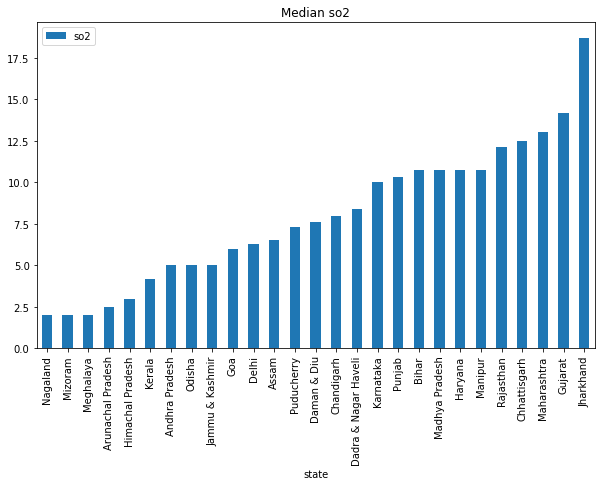

In [25]:
so2_state.plot(kind = 'bar', title = 'Median so2', figsize = (10,6))

### no2 status

In [26]:
#Calculate median value of no2 in ascending order
no2_pivot = df.pivot_table(index= 'state', values= 'no2', aggfunc='median')
no2_state = no2_pivot.sort_values(by = 'no2')
no2_state

,no2
state,
Arunachal Pradesh,5.00
Mizoram,5.00
Nagaland,7.00
Meghalaya,10.00
Goa,11.60
Jammu & Kashmir,13.00
Puducherry,13.00
Himachal Pradesh,13.90
Assam,14.00


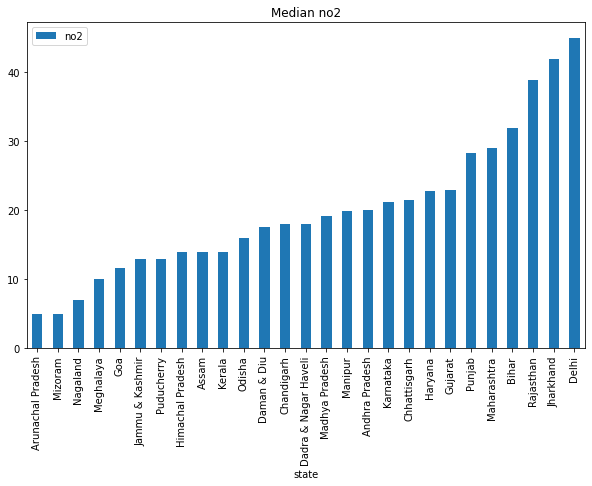

In [27]:
no2_state.plot(kind = 'bar', title = 'Median no2', figsize = (10,6))

### rspm status

In [28]:
#Calculate median value of rspm in ascending order
rspm_state = df.groupby("state")['rspm'].median().sort_values()
rspm_state = pd.DataFrame(rspm_state)
rspm_state

,rspm
state,
Mizoram,40.000000
Puducherry,46.000000
Kerala,49.000000
Goa,56.000000
Meghalaya,57.000000
Manipur,61.000000
Karnataka,63.000000
Arunachal Pradesh,74.500000
Andhra Pradesh,76.000000


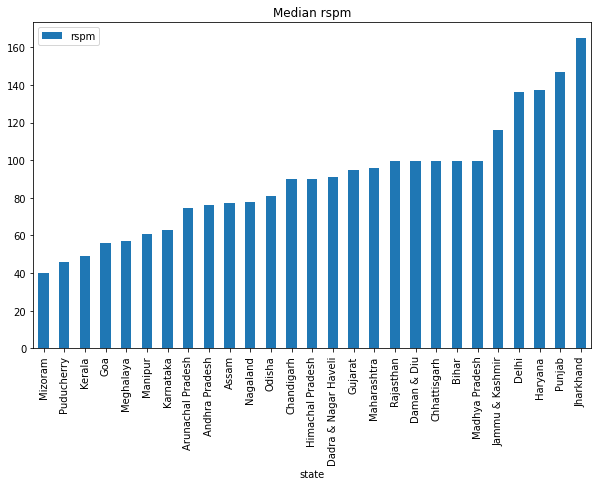

In [29]:
rspm_state.plot(kind = 'bar', title = 'Median rspm',figsize = (10,6))

### spm status

In [30]:
#Calculate median value of spm in ascending order
spm_state = df.groupby("state")['spm'].median().sort_values()
spm_state = pd.DataFrame(spm_state)
spm_state

,spm
state,
Manipur,119.000000
Andhra Pradesh,193.327792
Puducherry,193.327792
Odisha,193.327792
Nagaland,193.327792
Mizoram,193.327792
Meghalaya,193.327792
Maharashtra,193.327792
Madhya Pradesh,193.327792


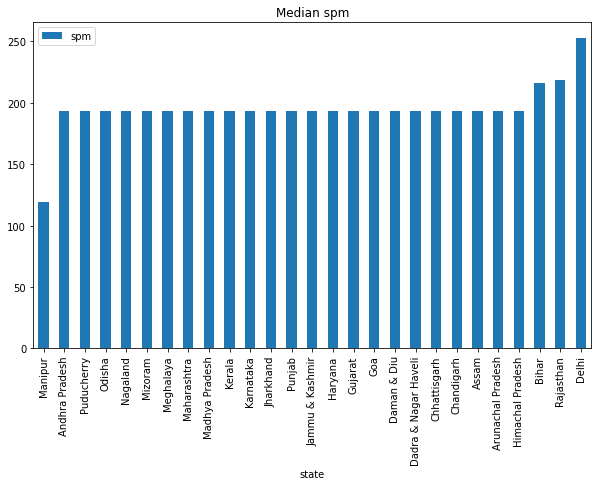

In [31]:
spm_state.plot(kind = 'bar', title = 'Median spm', figsize = (10,6))


### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [32]:
#new dataframe with NO2, SO2, rspm, and spm data
newdf = df.loc[df.state == 'Andhra Pradesh', ['state', 'no2', 'so2', 'rspm', 'spm','year']]
Andhra_df = newdf.groupby('year').median()
Andhra_df

,no2,so2,rspm,spm
year,,,,
1990.0,13.60,5.60,99.421544,179.000000
1991.0,12.80,8.25,99.421544,141.500000
1992.0,27.60,12.40,99.421544,192.000000
1993.0,11.40,6.00,99.421544,193.327792
1994.0,14.20,8.70,99.421544,193.327792
1995.0,26.30,14.10,99.421544,147.000000
1996.0,30.15,18.85,99.421544,181.500000
1997.0,28.40,16.40,99.421544,145.000000
1998.0,20.25,10.15,99.421544,152.000000


In [33]:
 #Display top 5 records after.
 Andhra_df.head(5)

,no2,so2,rspm,spm
year,,,,
1990.0,13.6,5.60,99.421544,179.000000
1991.0,12.8,8.25,99.421544,141.500000
1992.0,27.6,12.40,99.421544,192.000000
1993.0,11.4,6.00,99.421544,193.327792
1994.0,14.2,8.70,99.421544,193.327792


In [ ]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.


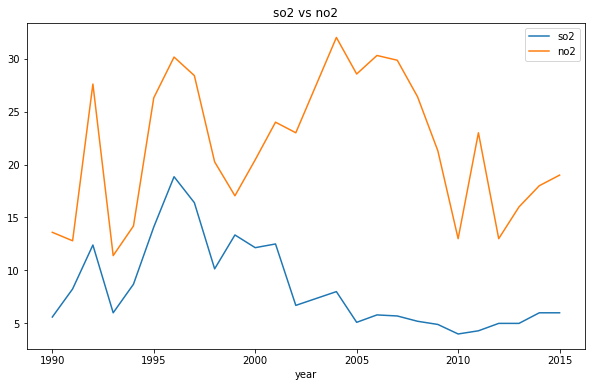

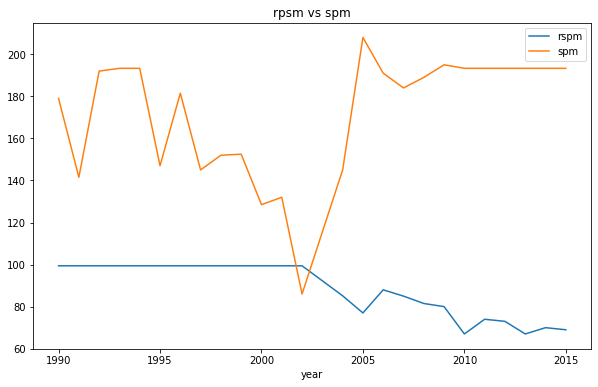

In [34]:
#Display yearly trend graph of so2 and no2 (year vs value)
Andhra_df.loc[:, ['so2', 'no2']].plot(kind = 'line', title = 'so2 vs no2', figsize = (10,6))

#Display yearly trend graph of rspm and spm (year vs value)
Andhra_df.loc[:, ['rspm', 'spm']].plot(kind = 'line', title = 'rpsm vs spm', figsize = (10,6))

Do you find anything alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



The graphs show a relationship between two air pollutants in the state of Andhra Pradesh. The first graph compares the yearly trend between sulfur dioxide and nitrogen dioxide whereas the second graph compares the yearly trend between rpsm and spm. 

The first graph shows that the amount of NO2 fluctuated across years whereas the amount of SO2 began to subside over the later date. The second graph shows that the amount of spm dropped to the lowest point in the year of 2002 but it skyrocketed in the later date. In comparison, the amount of rspm began to subsided startng in the year of 2002. 